In [1]:
import requests

In [2]:
url = 'https://www.pagina12.com.ar/'

In [3]:
p12 = requests.get(url)

In [4]:
p12.status_code

200

In [5]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:description" content="Notas

In [6]:
p12.content

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:desc

In [7]:
p12.headers

{'Date': 'Wed, 16 Sep 2020 11:10:39 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=da49b48c78d9a9e3b62a8de01b68f4e671600254639; expires=Fri, 16-Oct-20 11:10:39 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"5dd1b-mD3SPiq6YCWeZk1nYwlQ4FMA3uA"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '0', 'grace': '86400.000 none', 'ttl': '119.285', 'X-Instance': 'cache-front-prod-varnish-748c8f559f-pvf9n', 'x-restarts': '0', 'X-Cache': 'HIT (5)', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '05383515cb0000b2c6d125e200000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/bea

In [8]:
p12.request.headers #Encabezado con el que sale esta solicitud

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [9]:
p12.request.method #Con esto podemos saber que metodo GET que utilizamos para obtener informacion.

'GET'

In [10]:
p12.request.url #Consultando la URL a la que estamos conectando

'https://www.pagina12.com.ar/'

In [11]:
from bs4 import BeautifulSoup
#Esta biblioteca nos permite parsear el codigo HTML, es decir, agarramos todo el texto plano de nuestro sitio web
#y poder identificar distintas partes en donde estara la informacion que nos interesa

In [12]:
s = BeautifulSoup(p12.text, 'lxml')
#bs nos permite indicar un PARSe que es un pedazo de codigo que separa el texto largo en pequenios pedazos que sean
#mas facil de identificar y el resultado sera una sopa.

In [13]:
type(s) #Verificando el tipo de dato sopa

bs4.BeautifulSoup

In [14]:
print(s.prettify()) #Imprimiendo la sopa de manera pritificada

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar" name="og:url" property="og:url"/>
  <meta 

In [15]:
secciones = s.find('ul', attrs={'class':'hot-sections'}).find_all('li') #Guardamos lista en una variable
#El metodo find devuelve todo lo que encuentre primero con el tag UL y agregamos atributos en forma
#de diccionario para ser mas especificos.
secciones

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/recordatorios">Recordatorios</a></li>]

In [16]:
seccion = secciones[0]
#Obteniendo el primer elemento para trabajar mas facilmente el tratamiento a este elemento y despues
#replicarlo al resto de la seccion
seccion

<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

In [17]:
#seccion.find('a') #Con find retornamos el priomer tag que encontramos
seccion.a #Equivalente al metodo find

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [18]:
seccion.a.get('href') #Obtenemos en forma de string el texto de este atributo que es la URL o el link

'https://www.pagina12.com.ar/secciones/el-pais'

In [19]:
seccion.a.get_text() #Con esta funcion obtenemos el texto de esta etiqueta A

'El país'

In [20]:
#Creamos una lista por comprension donde para cada seccion vamos a acceder al tag a y nos quedaremos
#con el atributo hrf
links_secciones = [seccion.a.get('href') for seccion in secciones]

In [21]:
links_secciones #Obtendremos una lista con los link de cada uno de las asecciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa',
 'https://www.pagina12.com.ar/secciones/recordatorios']

# A partir de aqui repetimos los mismos pasos desde el input 2 pero con cada link del menu del sitio web en automatico

In [22]:
#Creamos una nueva solicitud para el primer enlace de la lista de links_secciones
sec = requests.get(links_secciones[0])

In [23]:
sec.status_code

200

In [24]:
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [25]:
print(s_seccion.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="El país | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" prope

In [26]:
featured_article = s_seccion.find('div', attrs={'class':'featured-article__container'})
print(featured_article.prettify())

<div class="featured-article__container">
 <span class="title-prefix">
  <a href="https://www.pagina12.com.ar/292350-la-ciudad-insiste-con-la-vuelta-a-clases-y-ahora-propone-apr">
   A estudiar a la intemperie
  </a>
 </span>
 <h2>
  <a href="https://www.pagina12.com.ar/292350-la-ciudad-insiste-con-la-vuelta-a-clases-y-ahora-propone-apr">
   La Ciudad insiste con la vuelta a clases y ahora propone aprender al aire libre
  </a>
 </h2>
 <a href="https://www.pagina12.com.ar/292350-la-ciudad-insiste-con-la-vuelta-a-clases-y-ahora-propone-apr">
  <p class="subhead">
   El Ministerio de Educación porteño modificó su propuesta después de que el gobierno nacional rechazara la apertura de escuelas, por los riesgos sanitarios. El nuevo plan, que propone llevar las aulas ...
  </p>
 </a>
 <div class="data-bar">
  <span class="date-1">
   16 de septiembre de 2020
  </span>
 </div>
</div>


In [27]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/292350-la-ciudad-insiste-con-la-vuelta-a-clases-y-ahora-propone-apr'

In [28]:
article_list = s_seccion.find('ul', attrs={'class': 'article-list'})

In [29]:
print(article_list.prettify())

<ul class="article-list">
 <li>
 </li>
 <li>
  <div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="15">
   <div class="first-col column small-8 xsmall-8">
    <div class="article-box__container">
     <h5 class="hide-for-xsmall-only hide-for-small-only">
     </h5>
     <h2>
      <a href="https://www.pagina12.com.ar/292356-juntos-por-el-cambio-va-con-agenda-propia-al-recinto">
       Juntos por el Cambio va con agenda propia al recinto
       <i>
        |
       </i>
       <span>
        La oposición prepara otro show en el Congreso
       </span>
      </a>
     </h2>
     <div class="data-bar">
      <span class="date-1">
       16 de septiembre de 2020
      </span>
     </div>
    </div>
   </div>
   <div class="second-col column small-4 xsmall-4 no-pad-left-sm">
    <div class="article-box__image-container">
     <a class="relative object-fit intrinsic-container intrinsic-containe

# Obteniendo todos los links de la seccion ELPAIS

In [30]:
featured_article_link = [featured_article.find('a').get('href')]
featured_article_link

['https://www.pagina12.com.ar/292350-la-ciudad-insiste-con-la-vuelta-a-clases-y-ahora-propone-apr']

In [31]:
articles_h2 = s_seccion.find('ul', attrs={'class': 'article-list'}).find_all('h2')

In [32]:
articles_h2

[<h2><a href="https://www.pagina12.com.ar/292356-juntos-por-el-cambio-va-con-agenda-propia-al-recinto">Juntos por el Cambio va con agenda propia al recinto<i>|</i><span>La oposición prepara otro show en el Congreso</span></a></h2>,
 <h2><a href="https://www.pagina12.com.ar/292232-la-corte-suprema-desairo-a-los-jueces-bruglia-y-bertuzzi">La Corte Suprema desairó a los jueces Bruglia y Bertuzzi<i>|</i><span>No hubo per saltum y deberán enfrentar la resolución del Senado</span></a></h2>,
 <h2><a href="https://www.pagina12.com.ar/292359-espionaje-ilegal-declaro-el-primero-de-los-super-mario-bros">Espionaje ilegal: Declaró el primero de los "Súper Mario Bros"<i>|</i><span>El expolicía Gustavo Ciccarelli, imputado como agente inorgánico de la AFI</span></a></h2>,
 <h2><a href="https://www.pagina12.com.ar/292246-un-canal-social-latinoamericano-construido-de-manera-colecti">Un canal social latinoamericano construido de manera colectiva<i>|</i><span>Propuesta político cultural</span></a></h2>,


In [33]:
articles_a = [article_h2.find('a', attrs= {'class': ''}) for article_h2 in articles_h2]

In [34]:
articles_a

[<a href="https://www.pagina12.com.ar/292356-juntos-por-el-cambio-va-con-agenda-propia-al-recinto">Juntos por el Cambio va con agenda propia al recinto<i>|</i><span>La oposición prepara otro show en el Congreso</span></a>,
 <a href="https://www.pagina12.com.ar/292232-la-corte-suprema-desairo-a-los-jueces-bruglia-y-bertuzzi">La Corte Suprema desairó a los jueces Bruglia y Bertuzzi<i>|</i><span>No hubo per saltum y deberán enfrentar la resolución del Senado</span></a>,
 <a href="https://www.pagina12.com.ar/292359-espionaje-ilegal-declaro-el-primero-de-los-super-mario-bros">Espionaje ilegal: Declaró el primero de los "Súper Mario Bros"<i>|</i><span>El expolicía Gustavo Ciccarelli, imputado como agente inorgánico de la AFI</span></a>,
 <a href="https://www.pagina12.com.ar/292246-un-canal-social-latinoamericano-construido-de-manera-colecti">Un canal social latinoamericano construido de manera colectiva<i>|</i><span>Propuesta político cultural</span></a>,
 <a href="https://www.pagina12.com.a

In [35]:
articles_links = [article_a.get('href') for article_a in articles_a]

In [36]:
articles_links

['https://www.pagina12.com.ar/292356-juntos-por-el-cambio-va-con-agenda-propia-al-recinto',
 'https://www.pagina12.com.ar/292232-la-corte-suprema-desairo-a-los-jueces-bruglia-y-bertuzzi',
 'https://www.pagina12.com.ar/292359-espionaje-ilegal-declaro-el-primero-de-los-super-mario-bros',
 'https://www.pagina12.com.ar/292246-un-canal-social-latinoamericano-construido-de-manera-colecti',
 'https://www.pagina12.com.ar/292302-los-buenos-modales-no-llenan-la-olla',
 'https://www.pagina12.com.ar/292318-los-organismos-de-derechos-humanos-pidieron-mecanismos-que-a',
 'https://www.pagina12.com.ar/292161-la-noche-de-los-lapices-y-el-libro-de-emilce-moler-nunca-fui',
 'https://www.pagina12.com.ar/292165-un-pais-mas-federal-no-es-en-contra-de-nadie',
 'https://www.pagina12.com.ar/292339-cristina-kirchner-implemento-el-cupo-laboral-travesti-trans-',
 'https://www.pagina12.com.ar/292180-patricia-bullrich-volvio-recargada-con-una-confusa-frase-que',
 'https://www.pagina12.com.ar/292345-la-pulseada-cont

In [37]:
articulos_seccion_elpais = featured_article_link + articles_links
articulos_seccion_elpais

['https://www.pagina12.com.ar/292350-la-ciudad-insiste-con-la-vuelta-a-clases-y-ahora-propone-apr',
 'https://www.pagina12.com.ar/292356-juntos-por-el-cambio-va-con-agenda-propia-al-recinto',
 'https://www.pagina12.com.ar/292232-la-corte-suprema-desairo-a-los-jueces-bruglia-y-bertuzzi',
 'https://www.pagina12.com.ar/292359-espionaje-ilegal-declaro-el-primero-de-los-super-mario-bros',
 'https://www.pagina12.com.ar/292246-un-canal-social-latinoamericano-construido-de-manera-colecti',
 'https://www.pagina12.com.ar/292302-los-buenos-modales-no-llenan-la-olla',
 'https://www.pagina12.com.ar/292318-los-organismos-de-derechos-humanos-pidieron-mecanismos-que-a',
 'https://www.pagina12.com.ar/292161-la-noche-de-los-lapices-y-el-libro-de-emilce-moler-nunca-fui',
 'https://www.pagina12.com.ar/292165-un-pais-mas-federal-no-es-en-contra-de-nadie',
 'https://www.pagina12.com.ar/292339-cristina-kirchner-implemento-el-cupo-laboral-travesti-trans-',
 'https://www.pagina12.com.ar/292180-patricia-bullric

# Manejo de errores

In [40]:
r =requests.get(url)

In [39]:
if r.status_code == 200:
    # Procesamos la respuest
else:
    # Informamos el error

IndentationError: expected an indented block (<ipython-input-39-f04fc072bb4c>, line 3)

In [46]:
url_nota = articulos_seccion_elpais[0]

In [68]:
#Encapsularemos toda la request
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        
        #Extraemos el titulo
        titulo = s_nota.find('h1', attrs={'class': 'article-title'})
        print(titulo.text)
        
        #Extraemos la fecha
        fecha = s_nota.find('span', attrs={'pubdate': 'pubdate'}).get('datetime')
        print(fecha)
        
        #Extraemos la Volanta
        volanta = s_nota.find('h2', attrs={'class': 'article-prefix'})
        print(volanta.get_text()) #.text == .get_text() > TRUE
        
        #Extraemos el Copete
        copete = s_nota.find('div', attrs={'class': 'article-summary'})
        print(copete.text)
        
        #Extraemos el Cuerpo
        cuerpo = s_nota.find('div', attrs={'class': 'article-text'})
        print(cuerpo.text)
        
        #Extraemos el Autor
        autor = s_nota.find('div', attrs={'class': 'article-author'})
        if autor == None:
            print('Articulo Sin Autor')
        else:
            ('autor: ' + autor.text)
        
except Exception as e:
    print('Error: ')
    print(e)
    print('\n')

La Ciudad insiste con la vuelta a clases y ahora propone aprender al aire libre
2020-09-16
A estudiar a la intemperie
El Ministerio de Educación porteño modificó su propuesta después de que el gobierno nacional rechazara la apertura de escuelas, por los riesgos sanitarios. El nuevo plan, que propone llevar las aulas a calles, plazas y playones, está dirigido a los 6500 estudiantes que perdieron su vínculo con la escuela y también contempla a alumnos del último año del secundario. La Ciudad pretende ponerlo en marcha el 28 de septiembre, pero antes debe ser aprobado por el Ministerio de Educación nacional.
El gobierno de la Ciudad de Buenos Aires presentó una nueva propuesta para que 6500 alumnos porteños que "perdieron contacto con la escuela" vuelvan a tener clases presenciales. El plan contempla que la actividad se realice en espacios públicos como calles, plazas y parques, a partir del 28 de septiembre.
La ministra de Educación porteña, Soledad Acuña, le llevó a su par nacional, Nic

In [69]:
media = s_nota.find('div', attrs={'class': 'article-main-media-image'})

In [78]:
imagenes = media.find_all('img')
imagenes

[<img alt="El plan de CABA, que ahora evaluará la Nación, es llevar las aulas a calles y plazas." class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-09/105249-10-a-0.jpg?itok=_HuhXFfY" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="El plan de CABA, que ahora evaluará la Nación, es llevar las aulas a calles y plazas." class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/105249-10-a-0.jpg?itok=W_kP0NDu" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="El plan de CABA, que ahora evaluará la Nación, es llevar las aulas a calles y plazas." class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/105249-10-a-0.jpg?itok=W_kP0NDu" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="El plan de CABA, que 

In [79]:
if len(imagenes) == 0:
    print('No se encontraron imagenes')
else:
    imagen = imagenes[-1]
    img_src = imagen.get('data-src')
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/105249-10-a-0.jpg?itok=W_kP0NDu


In [80]:
img_req = requests.get(img_src)

In [81]:
img_req.status_code

200

In [86]:
#ibreria para mostrar imagenes en Jupyther
from IPython.display import Image

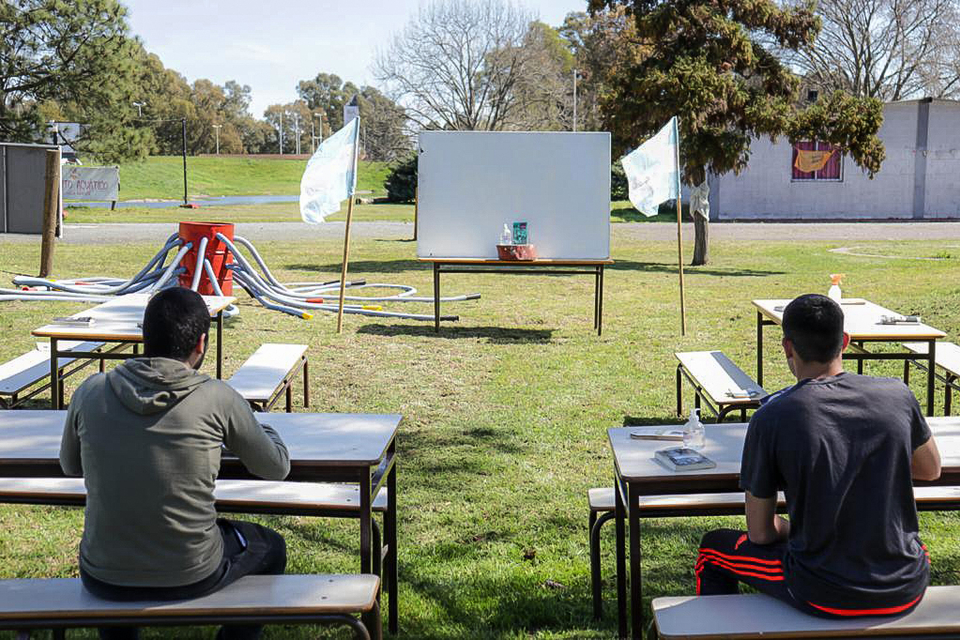

In [88]:
#Utilizamos el atributo content para extraer la imagen
Image(img_req.content)

# Creando metodo para obtener toda la info de una nota

In [ ]:
def obtener_info(s_nota): #Definiendo metodo donde en el parametro enviaremos la URL de la nota
    #Creamos un diccionario 
    